<a href="https://colab.research.google.com/github/abee62/Covid_Detection_Stream_project/blob/main/covid_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Covid-19 Detection using Deep Neural Network 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import Dense, Conv2D, MaxPool2D, Dropout,Flatten
from keras.models import Sequential
from keras.preprocessing import image
from keras.utils.vis_utils import plot_model
import os
os.listdir("/content/drive/MyDrive/Stream_data/Covid19-dataset")

['test', 'train']

#Loading the data

In [ ]:
train_datagen = image.ImageDataGenerator(
    rescale = 1/255, horizontal_flip = True, zoom_range = 0.2, shear_range = 0.2
)

train_data = train_datagen.flow_from_directory(directory = "/content/drive/MyDrive/Stream_data/Covid19-dataset/train", target_size=(256,256), batch_size=16,
                                                                                                                                    class_mode = 'binary')

Found 181 images belonging to 2 classes.


In [ ]:
train_data.class_indices

{'Covid': 0, 'Normal': 1}

In [ ]:
test_datagen = image.ImageDataGenerator(
    rescale = 1/255
)

test_data = train_datagen.flow_from_directory(directory = "/content/drive/MyDrive/Stream_data/Covid19-dataset/test", target_size=(256,256), batch_size=16,
                                                                                                                                    class_mode = 'binary')

Found 46 images belonging to 2 classes.


In [ ]:
train_dir = "/content/drive/MyDrive/Stream_data/Covid19-dataset/test"
test_dir = "/content/drive/MyDrive/Stream_data/Covid19-dataset/test"

##Samples of Normal Images in the Training Datatset

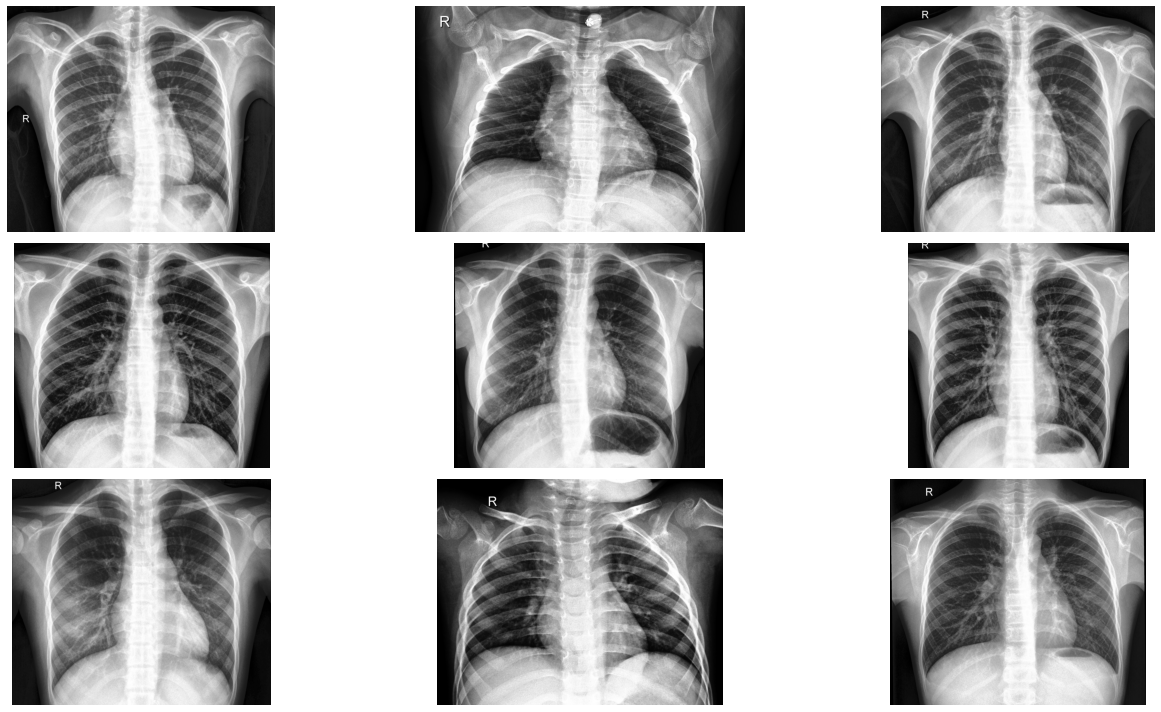

In [ ]:
normal = os.listdir("/content/drive/MyDrive/Stream_data/Covid19-dataset/train/Normal")
normal_dir = "/content/drive/MyDrive/Stream_data/Covid19-dataset/train/Normal"

plt.figure(figsize=(20, 10))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    img = plt.imread(os.path.join(normal_dir, normal[i]))
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    
plt.tight_layout()

##Samples of Covid positive images in the Training Dataset

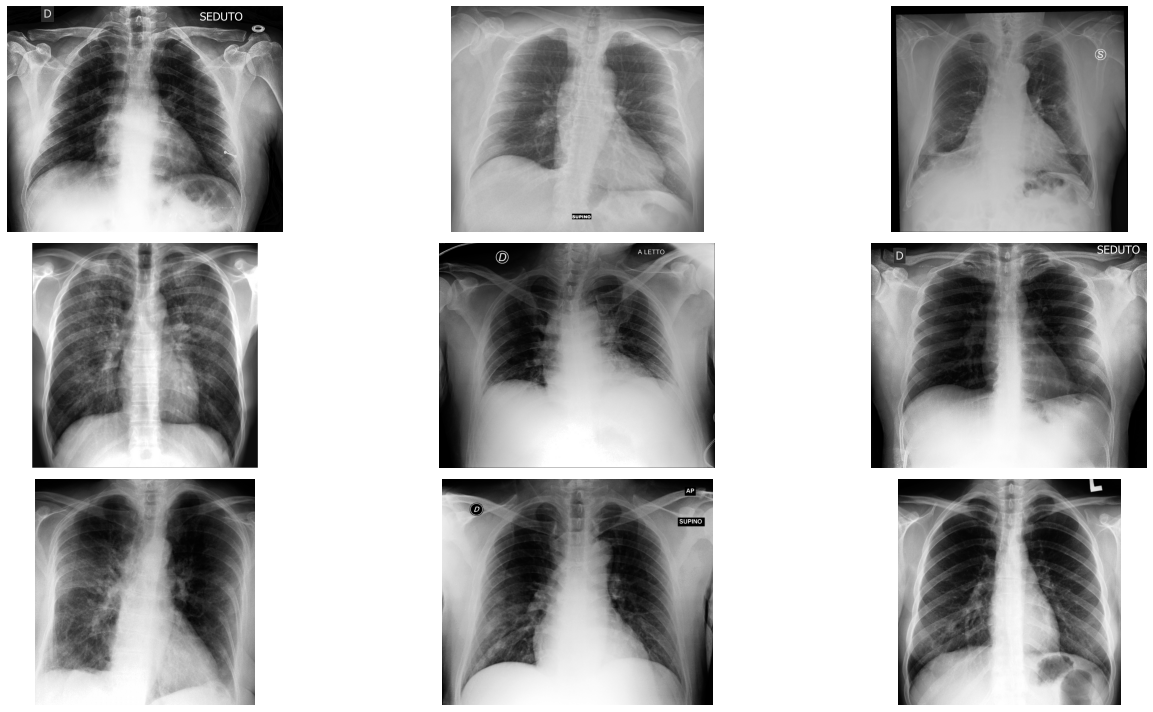

In [ ]:
covid = os.listdir("/content/drive/MyDrive/Stream_data/Covid19-dataset/train/Covid")
covid_dir = "/content/drive/MyDrive/Stream_data/Covid19-dataset/train/Covid"

plt.figure(figsize=(20, 10))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    img = plt.imread(os.path.join(covid_dir, covid[i]))
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    
plt.tight_layout()

# CNN MODEL


In [ ]:
model = Sequential()

model.add(Conv2D(filters= 32, kernel_size = (3,3), activation='relu', input_shape=(256,256,3)))

model.add(Conv2D(filters= 64, kernel_size = (3,3), activation='relu'))
model.add(MaxPool2D())
model.add(Dropout(rate = 0.25))

model.add(Conv2D(filters= 64, kernel_size = (3,3), activation='relu'))
model.add(MaxPool2D())
model.add(Dropout(rate = 0.25))

model.add(Conv2D(filters= 128, kernel_size = (3,3), activation='relu'))
model.add(MaxPool2D())
model.add(Dropout(rate = 0.25))

model.add(Flatten())
model.add(Dense(units = 64, activation = 'relu'))
model.add(Dropout(rate = 0.50))
model.add(Dense(units= 1, activation = 'sigmoid'))

model.compile(loss = keras.losses.binary_crossentropy, optimizer = "adam", metrics = ['acc'])

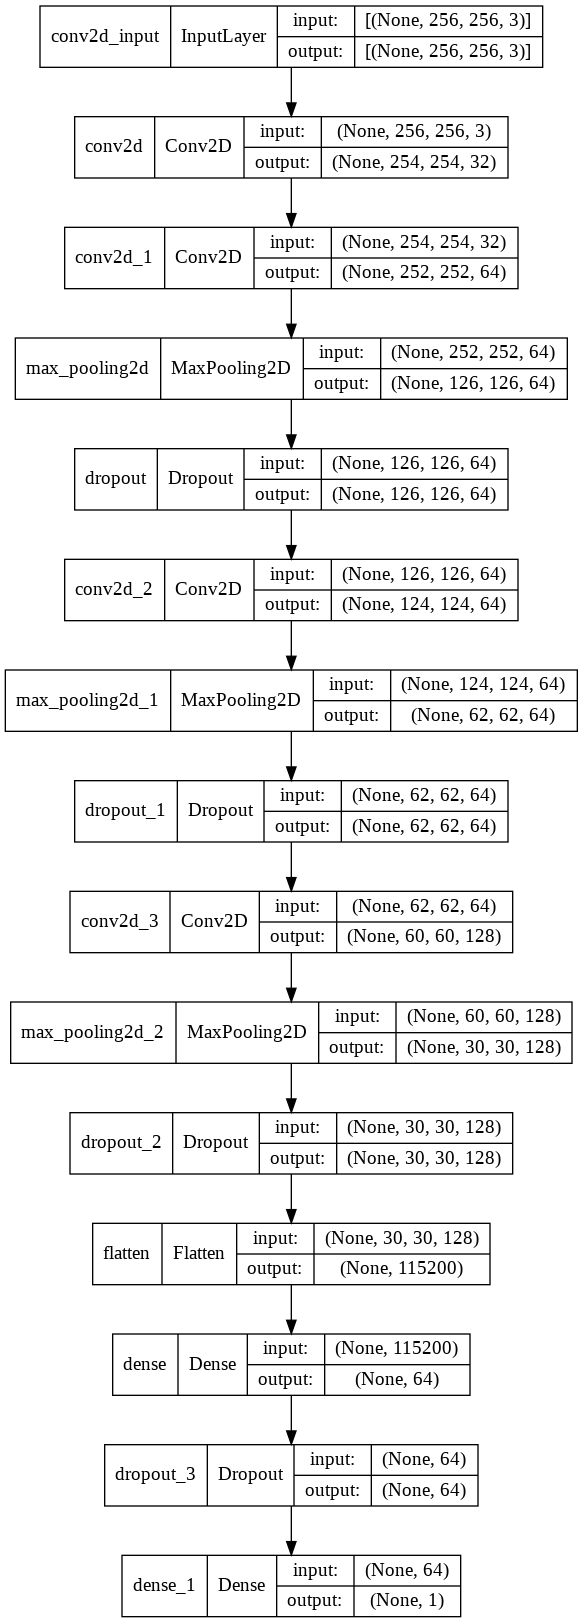

In [ ]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 252, 252, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 126, 126, 64)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 126, 126, 64)      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 124, 124, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                    

In [ ]:
r = model.fit_generator(train_data, steps_per_epoch=8, epochs=10, validation_steps=2,
                    validation_data = test_data)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/10
8/8 [==============================] - 57s 7s/step - loss: 1.6340 - acc: 0.5043 - val_loss: 0.7070 - val_acc: 0.5000
Epoch 2/10
8/8 [==============================] - 23s 3s/step - loss: 0.6739 - acc: 0.5781 - val_loss: 0.6821 - val_acc: 0.6875
Epoch 3/10
8/8 [==============================] - 14s 2s/step - loss: 0.6056 - acc: 0.7188 - val_loss: 0.6011 - val_acc: 0.6562
Epoch 4/10
8/8 [==============================] - 12s 2s/step - loss: 0.5446 - acc: 0.7734 - val_loss: 0.5688 - val_acc: 0.7812
Epoch 5/10
8/8 [==============================] - 13s 2s/step - loss: 0.4971 - acc: 0.7692 - val_loss: 0.4108 - val_acc: 0.8125
Epoch 6/10
8/8 [==============================] - 12s 1s/step - loss: 0.3999 - acc: 0.8438 - val_loss: 0.3903 - val_acc: 0.9062
Epoch 7/10
8/8 [==============================] - 12s 2s/step - loss: 0.3768 - acc: 0.8281 - val_loss: 0.5327 - val_acc: 0.7500
Epoch 8/10
8/8 [==============================] - 11s 1s/step - loss: 0.3903 - acc: 0.8632 - val_loss: 0

In [ ]:
path = "/content/drive/MyDrive/Stream_data/Covid19-dataset/test/Normal/0106.jpeg"
img = image.load_img(path,target_size=(256,256))

img = image.img_to_array(img)/255
img = np.array([img])
img.shape

(1, 256, 256, 3)

In [ ]:
(model.predict(img) > 0.5).astype("int32")

array([[1]], dtype=int32)

In [ ]:
path = "/content/drive/MyDrive/Stream_data/WhatsApp Image 2021-12-12 at 8.25.40 AM.jpeg"
img = image.load_img(path,target_size=(256,256))

img = image.img_to_array(img)/255
img = np.array([img])
img.shape

(1, 256, 256, 3)

In [ ]:
(model.predict(img) > 0.5).astype("int32")

array([[0]], dtype=int32)